In [ ]:
import sender_reciever as sr
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def run_game(money, game_number, df, rounds, row):
    sender_acc = money
    receiver_acc = 0

    print(f"\n=== Game {game_number} ===")
    for round_num in range(rounds):
        print(f"Round {round_num + 1}:")
        print(f"Sender's account: {sender_acc}, Receiver's account: {receiver_acc}")
        
        amount_sent, amount_sent_back = sr.run_round(sender_acc, rounds - (round_num + 1), sender_acc, receiver_acc)
        print(f"Amount sent by sender: {amount_sent}, Amount sent back by receiver: {amount_sent_back}")
        
        df.loc[row] = [game_number, sender_acc, receiver_acc, amount_sent, amount_sent_back, None, None]

        sender_acc = sender_acc - amount_sent + amount_sent_back
        receiver_acc = receiver_acc - amount_sent_back + amount_sent * 2
        print(f"Sender's account: {sender_acc}, Receiver's account: {receiver_acc}\n\n")

        df.loc[row, "Final Sender Amount"] = sender_acc
        df.loc[row, "Final Receiver Amount"] = receiver_acc
        row += 1

    if sender_acc > receiver_acc:
        return 1, row
    elif receiver_acc > sender_acc:
        return -1, row
    else:
        return 0, row

In [6]:
df = pd.DataFrame(columns=["Game", "Start Sender Amount", "Start Receiver Amount", "Amount Sent By Sender", "Amount Sent By Receiver", "Final Sender Amount", "Final Receiver Amount"])
s_wins = 0
r_wins = 0
ties = 0
game_fails = 0
rounds = 20
row = 0
for i in range(30):
    if i%5 == 0:
        print("Sender wins:", s_wins, "Receiver wins:", r_wins, "Ties:", ties, "Game fails:", game_fails)
    try:
        result, row = run_game(15, i+1, df, rounds, row)
        if result == 1:
            s_wins += 1
        elif result == -1:
            r_wins += 1
        else:
            ties += 1
    except Exception as e:
        print(f"Error in game {i+1}: {e}")
        game_fails += 1
        
    print(df)
    
df.to_csv("sr_games_15m_20r.csv", index=False)

Sender wins: 0 Receiver wins: 0 Ties: 0 Game fails: 0

=== Game 1 ===
Round 1:
Sender's account: 15, Receiver's account: 0
Amount sent by sender: 7, Amount sent back by receiver: 7
Sender's account: 15, Receiver's account: 7


Round 2:
Sender's account: 15, Receiver's account: 7
Amount sent by sender: 9, Amount sent back by receiver: 3
Sender's account: 9, Receiver's account: 22


Round 3:
Sender's account: 9, Receiver's account: 22
Amount sent by sender: 3, Amount sent back by receiver: 3
Sender's account: 9, Receiver's account: 25


Round 4:
Sender's account: 9, Receiver's account: 25
Amount sent by sender: 8, Amount sent back by receiver: 4
Sender's account: 5, Receiver's account: 37


Round 5:
Sender's account: 5, Receiver's account: 37
Amount sent by sender: 2, Amount sent back by receiver: 1
Sender's account: 4, Receiver's account: 40


Round 6:
Sender's account: 4, Receiver's account: 40
Amount sent by sender: 2, Amount sent back by receiver: 1
Sender's account: 3, Receiver's ac

In [27]:
print("Sender wins:", s_wins, "Receiver wins:", r_wins, "Ties:", ties, "Game fails:", game_fails)

Sender wins: 0 Receiver wins: 30 Ties: 0 Game fails: 0


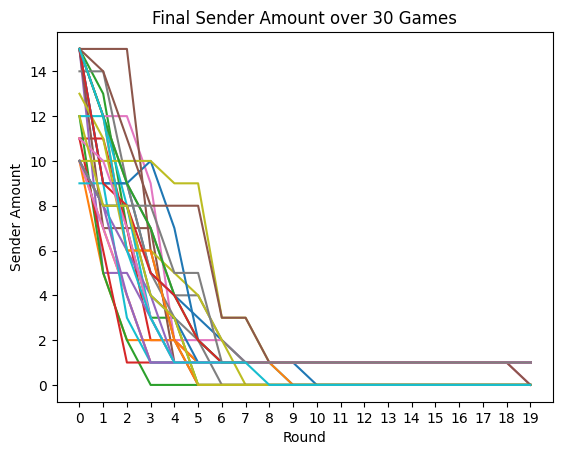

In [30]:
for i in range(0, 600, 20):
    new_df = df.iloc[i:i+20]
    new_df = new_df.reset_index(drop=True)
    plt.plot(new_df["Final Sender Amount"])
    plt.xticks(range(20))
plt.title("Final Sender Amount over 30 Games")
plt.xlabel("Round")
plt.ylabel("Sender Amount")
plt.show()
    

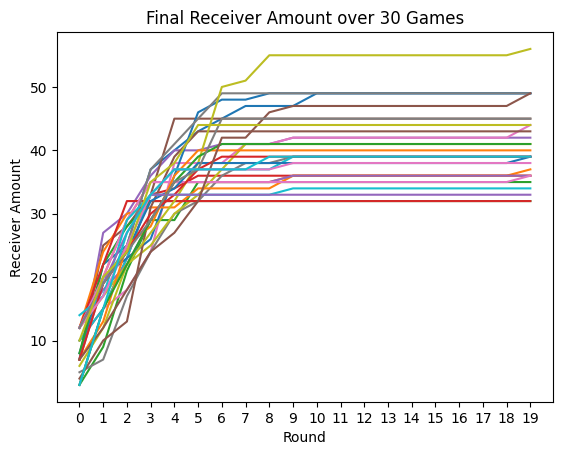

In [31]:
for i in range(0, 600, 20):
    new_df = df.iloc[i:i+20]
    new_df = new_df.reset_index(drop=True)
    plt.plot(new_df["Final Receiver Amount"])
    plt.xticks(range(20))
plt.title("Final Receiver Amount over 30 Games")
plt.xlabel("Round")
plt.ylabel("Receiver Amount")
plt.show()